# 4.5  Regularization

## 4.5.2 Example: MAP estimation for the multivariate Gaussian *

> Based on https://github.com/probml/pmtk3/blob/master/demos/shrinkcovDemo.m
> Converted by John Fearns - jdf22@infradead.org
> Demo of the quality of shrinkage estimation of a covariance matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A function that generates a random covariance matrix (and its inverse) with the given condition number
# and with the given first axis a (unnormalised). Returns (Sigma, Lambda).
def covcond(cond_number, a):
    # Use the Householder trick to generate a basis Z whose first axis points in the direction of a.
    a = np.copy(a)
    a[0] = a[0] + np.sign(a[1]) * np.linalg.norm(a)
    Z = np.eye(len(a)) - 2 * np.matmul(a.reshape(-1, 1), a.reshape(1, -1)) / np.linalg.norm(a) ** 2

    e = np.flip(np.sort(1.0 / np.linspace(cond_number, 1, len(a))))
    Sigma = np.matmul(np.matmul(Z, np.diag(e)), Z.transpose())
    Lambda = np.matmul(np.matmul(Z, np.diag(1 / e)), Z.transpose())

    return (Sigma, Lambda)

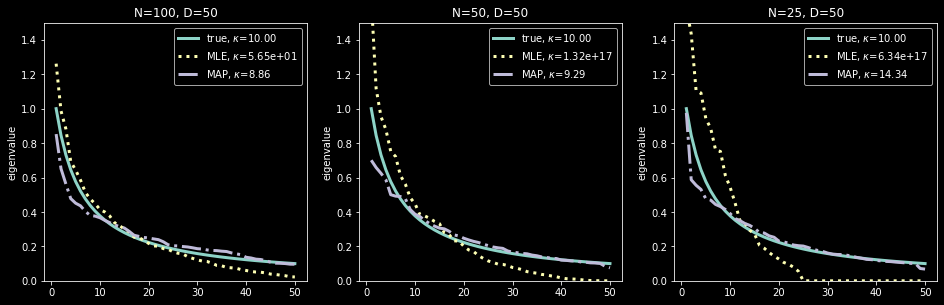

In [10]:
# Generate a random covariance matrix with condition number 10
# and record its eigenvalues.
rng = np.random.default_rng()

# Dimensions
D = 50
a = rng.standard_normal(size=(D, 1))

cond_number = 10
Sigma, Lambda = covcond(cond_number, a)
evals_true = np.flip(np.sort(np.linalg.eig(Sigma)[0]))

# Fractions of D
fractions = [2, 1, 1 / 2]

# Make way for 3 plots arranged in a suitable 1x3 grid.
figure, axes = plt.subplots(1, 3, figsize=(16, 4.75))
linewidth = 3

for i in range(len(fractions)):
    # How many samples?
    n = int(fractions[i] * D)

    # Sample using Sigma.
    X = rng.multivariate_normal(np.zeros(D), Sigma, size=n)

    # We set bias=True to get the MLE estimate of Sigma.
    S_mle = np.cov(X, rowvar=False, bias=True)
    evals_mle = np.flip(np.sort(np.linalg.eig(S_mle)[0]))

    # Get the MAP estimate of Sigma.
    _lambda = 0.9
    S_shrink = _lambda * np.diag(np.diag(S_mle)) + (1 - _lambda) * S_mle
    evals_shrink = np.flip(np.sort(np.linalg.eig(S_shrink)[0]))

    # Plot the eigevalues of the estimates and the true covariance matrix.
    ax = axes[i]
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('eigenvalue')
    ax.plot(
        np.arange(1, D + 1),
        evals_true,
        linestyle="-",
        linewidth=linewidth,
        label=f"true, $\kappa$={np.linalg.cond(Sigma):.2f}"
    )
    ax.plot(
        np.arange(1, D + 1),
        evals_mle,
        linestyle=":",
        linewidth=linewidth,
        label=f"MLE, $\kappa$={np.linalg.cond(S_mle):.2e}"
    )
    ax.plot(
        np.arange(1, D + 1),
        evals_shrink,
        linestyle="-.",
        linewidth=linewidth,
        label=f"MAP, $\kappa$={np.linalg.cond(S_shrink):.2f}"
    )
    ax.set_title(f"N={n}, D={D}")
    ax.legend(loc="upper right")
